<h2>Import Libraries</h2>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<p>Creating Data Frame for the CPU Data</p>

In [2]:
cpudf = pd.read_csv("machine.data", names = ['vendor name','Model Name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP'])

<p> Print 2 rows for sanity check to identify all the features</p>

In [3]:
cpudf.head(2)

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253


In [4]:
cpudf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   vendor name  209 non-null    object
 1   Model Name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [5]:
cpudf.dtypes

vendor name    object
Model Name     object
MYCT            int64
MMIN            int64
MMAX            int64
CACH            int64
CHMIN           int64
CHMAX           int64
PRP             int64
ERP             int64
dtype: object

<p>We can see that barring first two variables rest of them are numeric in nature. So we will be considering only the numeric fields. In next step we are going to divide the Df into categorical and numerical rows which we will use to train and test.</p>

In [6]:
categorical_rows = cpudf.iloc[:,:2]
numerical_rows= cpudf.iloc[:,2:]
data=numerical_rows
data.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132


<p> Checking Null Values in the Dataset</p>

In [7]:
numerical_rows.isna().sum()

MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
PRP      0
ERP      0
dtype: int64

<p> For handling null value need to check correlation before loosing important data
To Check correlation all data should be nominal converting categorical to numerical and showing relation</p>

In [8]:
data.corr()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
PRP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
ERP,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


<p>Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.</p>

<H2> Data Pre-processing and cleaning</h2>

<p> Checking Null Values </p>

In [9]:
data.isna().sum()

MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
PRP      0
ERP      0
dtype: int64

<p> No null Values </p>
<p> Handling Outliers</p>

In [10]:
numeric_col = ['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']

<AxesSubplot:>

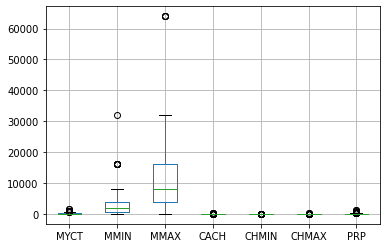

In [11]:
data.boxplot(numeric_col)

<P> Replacong the outlier with the median</p>
<P>in this technique, we replace the extreme values with the median value, 
you can use median or mean value but it is advised not to use the mean values
because it is highly susceptible to outliers.
</P>

In [20]:
for x in numeric_col:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    data.loc[data[x] < min,x] = data[x].median()
    data.loc[data[x] > max,x] = data[x].median()

In [21]:
data.isnull().sum()

MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
PRP      0
ERP      0
dtype: int64

In [22]:
data=data.dropna()

In [23]:
data.isnull().sum()

MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
PRP      0
ERP      0
dtype: int64

In [24]:
data.head(10)

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125,256,6000,8,2,8,50,199
1,29,2000,32000,32,8,32,50,253
2,29,2000,32000,32,8,32,50,253
3,29,2000,32000,32,8,32,50,253
4,29,2000,16000,32,8,16,132,132
5,26,2000,32000,8,8,32,50,290
6,23,2000,32000,8,2,32,50,381
7,23,2000,32000,8,2,32,50,381
8,23,2000,8000,8,2,32,50,749
9,23,2000,8000,8,2,8,50,1238


<AxesSubplot:>

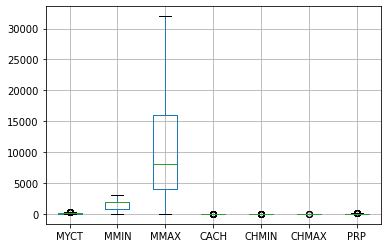

In [25]:
data.boxplot(numeric_col)

<h2>  Mean Normalization </h2>
<p> The point of normalization is to change your observations 
so that they can be described as a normal distribution.
Normal distribution (Gaussian distribution), also known as the bell curve, 
is a specific statistical distribution where a roughly equal observations fall above 
and below the mean. varies between -1 to 1 with mean = 0.</p>

In [26]:
data=preprocessing.normalize(data);
data

array([[2.07977206e-02, 4.25937317e-02, 9.98290588e-01, ...,
        1.33105412e-03, 8.31908823e-03, 3.31099712e-02],
       [9.04454593e-04, 6.23761788e-02, 9.98018861e-01, ...,
        9.98018861e-04, 1.55940447e-03, 7.89058662e-03],
       [9.04454593e-04, 6.23761788e-02, 9.98018861e-01, ...,
        9.98018861e-04, 1.55940447e-03, 7.89058662e-03],
       ...,
       [1.51562245e-02, 2.42499592e-01, 9.69998366e-01, ...,
        1.69749714e-03, 6.30498938e-03, 4.97124163e-03],
       [1.37198104e-02, 6.38594811e-02, 9.97804393e-01, ...,
        0.00000000e+00, 8.35661179e-03, 5.86210081e-03],
       [2.66673523e-02, 2.42430476e-01, 9.69721903e-01, ...,
        0.00000000e+00, 1.09093714e-02, 6.06076189e-03]])

In [27]:
df = pd.DataFrame(data, 
             columns=['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP'])
df.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,0.020798,0.042594,0.998291,0.001331,0.000333,0.001331,0.008319,0.033110
1,0.000904,0.062376,0.998019,0.000998,0.000250,0.000998,0.001559,0.007891
2,0.000904,0.062376,0.998019,0.000998,0.000250,0.000998,0.001559,0.007891
3,0.000904,0.062376,0.998019,0.000998,0.000250,0.000998,0.001559,0.007891
4,0.001798,0.124026,0.992207,0.001984,0.000496,0.000992,0.008186,0.008186


<h2>Select the predictor and target variables</h2>

In [28]:
X = numerical_rows.iloc[:,:-1]
y = numerical_rows.iloc[:,-1]

<h2>Train test split</h2>

<p>Case 1 : Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ;
[ x_test1,y_test1] = 20% ;</p>

In [29]:
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=.20,
random_state=42,
shuffle=True)

In [30]:
y_training_set = y_training_set.values.reshape(-1, 1)
y_test_set  = y_test_set.values.reshape(-1, 1)
y_scaler = StandardScaler()
# Fit on training set only.
y_scaler.fit(y_training_set)
# Apply transform to both the training set and the test set.
y_training_set = y_scaler.transform(y_training_set)
y_test_set = y_scaler.transform(y_test_set)

<p>Case 2 : Train = 10 % Test = 90% [ x_train2,y_train2] = 10% ;
[ x_test2,y_test2] = 90%</p>

In [68]:
x_training_set1, x_test_set1, y_training_set1, y_test_set1 = train_test_split(X,y,test_size=.90,
random_state=42,
shuffle=True)

In [69]:
y_training_set1 = y_training_set1.values.reshape(-1, 1)
y_test_set1  = y_test_set1.values.reshape(-1, 1)
y_scaler1 = StandardScaler()
# Fit on training set only.
y_scaler1.fit(y_training_set)
# Apply transform to both the training set and the test set.
y_training_set1 = y_scaler1.transform(y_training_set1)
y_test_set1 = y_scaler1.transform(y_test_set1)

<h2> K-fold Cross Validation</h2>

<p>To evaluate the performance of some model on a dataset, 
we need to measure how well the predictions made by the model match the observed data.
The most common way to measure this is by using the mean squared error (MSE), which is calculated as:

MSE = (1/n)*Σ(yi – f(xi))2

In practice, we use the following process to calculate the MSE of a given model:

1. Split a dataset into a training set and a testing set.

2. Build the model using only data from the training set.

3. Use the model to make predictions on the testing set and measure the test MSE.
</p>

<H2> K-fold cross-validation </H2> <p>uses the following approach to evaluate a model:

Step 1: Randomly divide a dataset into k groups, or “folds”, of roughly equal size.

Splitting a dataset into k folds

Step 2: Choose one of the folds to be the holdout set. Fit the model on the remaining k-1 folds. Calculate the test MSE on the observations in the fold that was held out.

k-fold cross-validation

Step 3: Repeat this process k times, using a different set each time as the holdout set.

Example of k-fold cross-validation

Step 4: Calculate the overall test MSE to be the average of the k test MSE’s.

Test MSE = (1/k)*ΣMSEi

where:

k: Number of folds
MSEi: Test MSE on the ith iteration
    </p>

In [70]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model2 = linear_model.LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model2, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))

59.635337434949044

In [71]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

#build multiple linear regression model
model2 = linear_model.LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model2, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

134.72184546774642

<h2>Training / model fitting :</h2>

<h3>Case1</h3>

In [72]:
model = linear_model.LinearRegression()
model.fit(x_training_set,y_training_set)

LinearRegression()

Coefficients:  [[-6.92664069e-04  9.45483482e-05  4.79901084e-05  4.51007003e-03
   1.15472147e-02  1.17283409e-02 -3.94998370e-03]]
Variance score: 0.44955853991183115


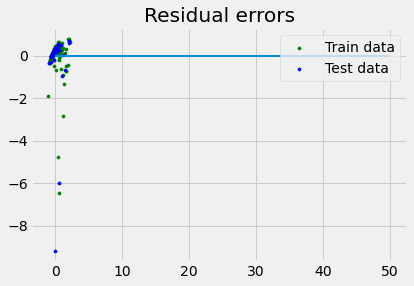

In [73]:
  # regression coefficients
print('Coefficients: ', model.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(model.score(x_training_set, y_training_set)))
  
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
## plotting residual errors in training data
plt.scatter(model.predict(x_training_set), model.predict(x_training_set) - y_training_set,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(model.predict(x_test_set), model.predict(x_test_set) - y_test_set,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(x_training_set,y_training_set)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print(model_score)
y_predicted = model.predict(x_test_set)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test_set, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test_set, y_predicted))

0.44955853991183115
Mean squared error: 2.96
Test Variance score: 0.12


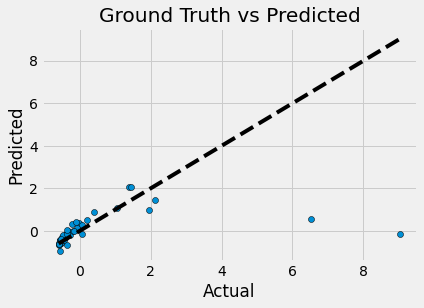

In [75]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predicted, edgecolors=(0, 0, 0))

ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'k--', lw=4)

ax.set_xlabel('Actual')

ax.set_ylabel('Predicted')

ax.set_title("Ground Truth vs Predicted")

plt.show()

<H3> Case 2 </H3>

In [77]:
model1 = linear_model.LinearRegression()

In [79]:
model1.fit(x_training_set1,y_training_set1)


LinearRegression()

Coefficients:  [[ 0.00436624  0.00467407  0.00541505  0.83740244  2.4424133  -0.09728802
  -0.32113171]]
Variance score: 0.986945971523656


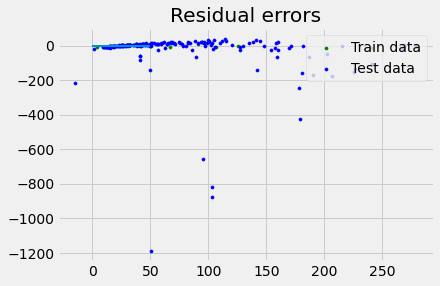

In [80]:
  # regression coefficients
print('Coefficients: ', model1.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(model1.score(x_training_set1, y_training_set1)))
  
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
## plotting residual errors in training data
plt.scatter(model1.predict(x_training_set1), model1.predict(x_training_set1) - y_training_set1,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(model1.predict(x_test_set1), model1.predict(x_test_set1) - y_test_set1,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

In [82]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model1.score(x_training_set1,y_training_set1)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print(model_score)
y_predicted1 = model1.predict(x_test_set1)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test_set1, y_predicted1))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test_set1, y_predicted1))

0.986945971523656
Mean squared error: 20177.06
Test Variance score: 0.22


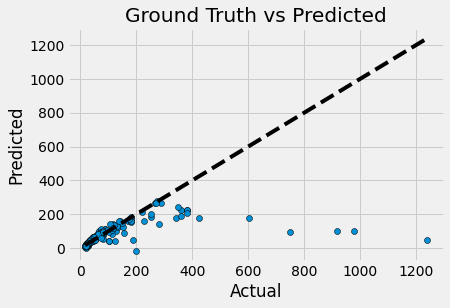

In [83]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(y_test_set1, y_predicted1, edgecolors=(0, 0, 0))

ax.plot([y_test_set1.min(), y_test_set1.max()], [y_test_set1.min(), y_test_set1.max()], 'k--', lw=4)

ax.set_xlabel('Actual')

ax.set_ylabel('Predicted')

ax.set_title("Ground Truth vs Predicted")

plt.show()

<h2>Evaluation Matrics</h2>

<h3> case 1</h3>

In [84]:
print("MAE",mean_absolute_error(y_test_set,y_predicted))
print("MSE",mean_squared_error(y_test_set,y_predicted))
print("RMSE",np.sqrt(mean_squared_error(y_test_set,y_predicted)))
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test_set,y_predicted))))
r2 = r2_score(y_test_set,y_predicted)
print("r2 score",r2)
n=40
k=2
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 score",adj_r2_score)

MAE 0.6016006258995328
MSE 2.961120079460627
RMSE 1.7207905391013245
RMSE 0.5427838009909768
r2 score 0.11542030688012428
adjusted r2 score 0.06760518833310392


<h3>case2</h3>

In [85]:
print("MAE",mean_absolute_error(y_test_set1,y_predicted1))
print("MSE",mean_squared_error(y_test_set1,y_predicted1))
print("RMSE",np.sqrt(mean_squared_error(y_test_set1,y_predicted1)))
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test_set1,y_predicted1))))
r2 = r2_score(y_test_set1,y_predicted1)
print("r2 score",r2)
n=40
k=2
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 score",adj_r2_score)

MAE 41.187940246590536
MSE 20177.057959156526
RMSE 142.04597128801834
RMSE 4.956150746673218
r2 score 0.21588560377895405
adjusted r2 score 0.17350104182105963


<p> For our model Best is Mean Absolute Error(MAE) </p>

<p> MAE is a very simple metric which calculates the absolute difference between actual and predicted values.

To better understand, let’s take an example you have input data and output data and use Linear Regression, which draws a best-fit line.

Now you have to find the MAE of your model which is basically a mistake made by the model known as an error. Now find the difference between the actual value and predicted value that is an absolute error but we have to find the mean absolute of the complete dataset.

so, sum all the errors and divide them by a total number of observations And this is MAE. And we aim to get a minimum MAE because this is a loss.

</p>

<h2>conclusion</h2>

<p>Our model is emitting the both over and under  , 
this is due to not removing the Outlier data as dataset was very less and replcing then with the median. Also due to the training and test % provided in both cases. it would have been perfect in case the data we provide in 70-30 ratio 
     The Test Variance score in both case is aroun 90%.
     Model score with 0.44955853991183115 with 80% training and 20 %test set
     Model score cause overfitting when we pass 10% training and 90% test data 0.986945971523656.
    

Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively 
impacts the performance of the model on new data. 
Overfitting is more likely with nonparametric and nonlinear models that have more flexibility when learning a target function. 
As such, many nonparametric machine learning algorithms also include parameters or techniques to limit and constrain 
how much detail the model learns.
    
Underfitting occurs when our machine learning model is not able to capture the underlying trend of the data. To avoid the overfitting in the model, the fed of training data can be stopped at an early stage, due to which the model may not learn enough from the training data. As a result, it may fail to find the best fit of the dominant trend in the data.
</p>